In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/train (3).csv', index_col='id')
df

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
id,,,,,,,,,,,,,,,,,,,,,
0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,yes,adult,535246,38.5,129.0,48.0,cool,reduced,pale_pink,more_3_sec,...,57.0,66.0,serosanguious,2.0,yes,2206,0,0,no,lived
1231,yes,adult,528570,37.5,60.0,50.0,cool,reduced,pale_cyanotic,less_3_sec,...,35.0,6.4,serosanguious,3.6,yes,2209,0,0,yes,died
1232,yes,young,529685,37.5,84.0,40.0,normal,reduced,normal_pink,less_3_sec,...,40.0,5.9,cloudy,7.0,yes,400,0,0,yes,lived


In [ ]:
df.isna().sum()

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
outcome                  0
dtype: int64

In [ ]:
object_columns = df.loc[:,df.dtypes==np.object].columns
object_columns

Index(['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'surgical_lesion',
       'cp_data', 'outcome'],
      dtype='object')

In [ ]:
numeric_columns = df.loc[:,df.dtypes!=np.object].columns
numeric_columns

Index(['hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate',
       'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein',
       'abdomo_protein', 'lesion_1', 'lesion_2', 'lesion_3'],
      dtype='object')

In [ ]:
df[numeric_columns].describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,9.545004e+05,38.202186,79.574089,30.054251,4.382591,49.602429,21.388016,3.290931,3832.496356,14.612146,3.577328
std,1.356403e+06,0.788668,29.108638,16.452066,1.937357,10.535800,26.676453,1.589195,5436.733774,193.705735,88.858953
min,5.213990e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.500000,0.100000,0.000000,0.000000,0.000000
25%,5.288000e+05,37.800000,53.000000,18.000000,2.000000,43.000000,6.600000,2.000000,2205.000000,0.000000,0.000000
50%,5.297770e+05,38.200000,76.000000,28.000000,4.500000,48.000000,7.500000,3.000000,2209.000000,0.000000,0.000000
75%,5.341450e+05,38.600000,100.000000,36.000000,6.000000,57.000000,9.100000,4.300000,3205.000000,0.000000,0.000000
max,5.305129e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,3112.000000,2209.000000


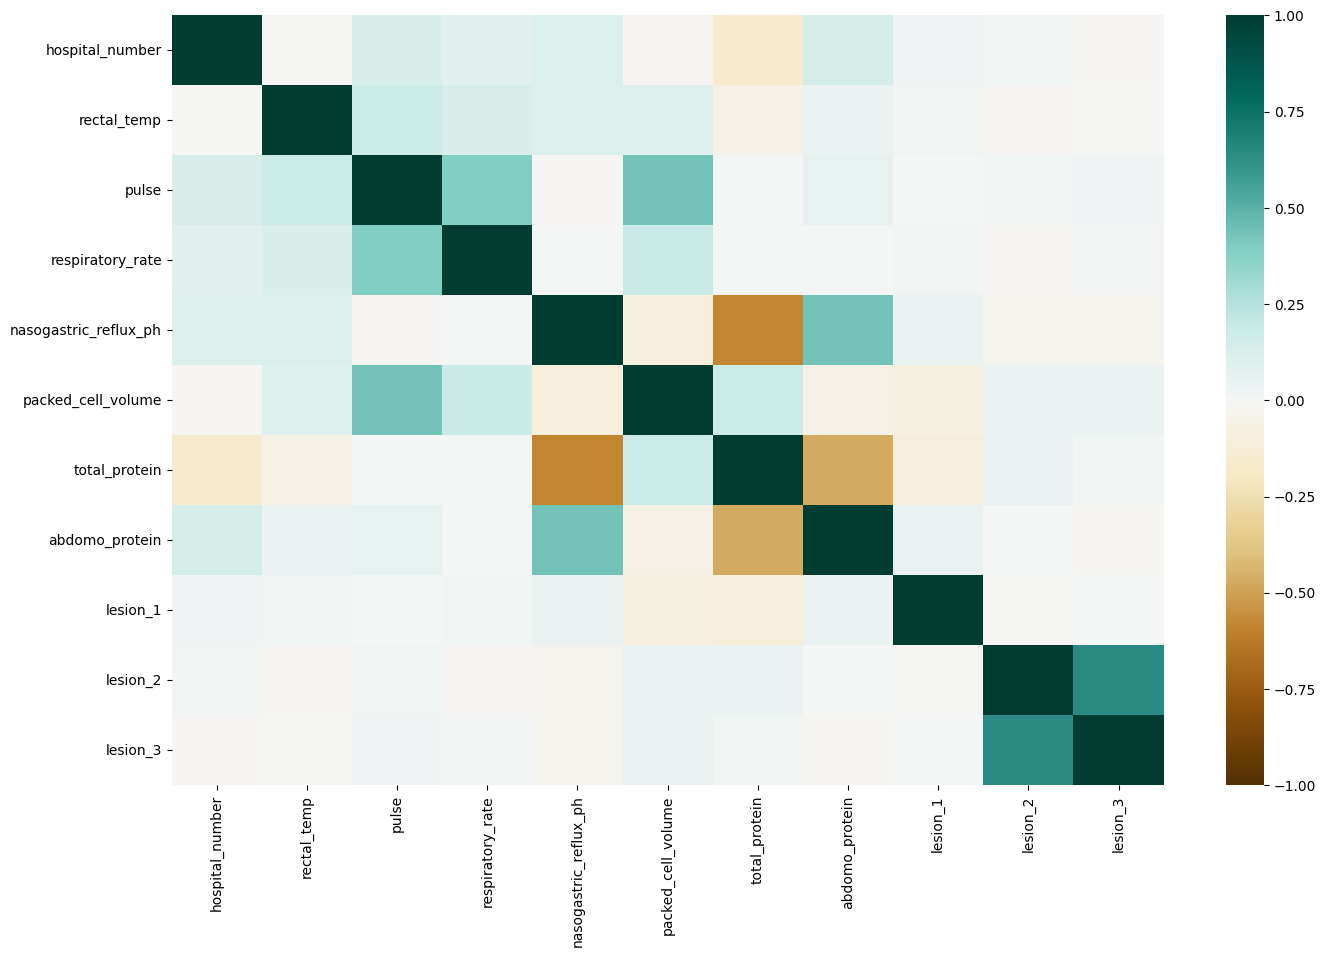

In [ ]:
fig = plt.figure()

fig.set_size_inches(16, 10)

sns.heatmap(df[numeric_columns].corr(),
            xticklabels=df[numeric_columns].columns,
            yticklabels=df[numeric_columns].columns,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

plt.show()

In [ ]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [ ]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(df[numeric_columns], 10))

Top Absolute Correlations
lesion_2               lesion_3              0.644054
nasogastric_reflux_ph  total_protein         0.583299
total_protein          abdomo_protein        0.469784
pulse                  packed_cell_volume    0.435102
nasogastric_reflux_ph  abdomo_protein        0.433006
pulse                  respiratory_rate      0.395130
respiratory_rate       packed_cell_volume    0.188777
rectal_temp            pulse                 0.176761
packed_cell_volume     total_protein         0.176178
hospital_number        total_protein         0.154746
dtype: float64


In [ ]:
df[object_columns].describe(include=object)

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,surgical_lesion,cp_data,outcome
count,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235
unique,2,2,5,5,7,4,7,6,5,4,5,6,6,4,2,2,3
top,yes,adult,cool,reduced,pale_pink,less_3_sec,depressed,hypomotile,moderate,slight,more_1_liter,absent,distend_small,serosanguious,yes,yes,lived
freq,887,1160,700,724,284,834,429,664,543,758,604,493,482,570,929,668,574


In [ ]:
df_dummed = pd.get_dummies(df.drop('outcome', axis=1), drop_first=True)
df_dummed

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,...,abdomen_distend_large,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_yes,cp_data_yes
id,,,,,,,,,,,,,,,,,,,,,
0,530001,38.1,132.0,24.0,6.5,57.0,8.5,3.4,2209,0,...,0,1,0,0,0,0,0,1,1,0
1,533836,37.5,88.0,12.0,2.0,33.0,64.0,2.0,2208,0,...,0,1,0,0,0,0,0,1,1,0
2,529812,38.3,120.0,28.0,3.5,37.0,6.4,3.4,5124,0,...,1,0,0,0,0,0,0,1,1,0
3,5262541,37.1,72.0,30.0,2.0,53.0,7.0,3.9,2208,0,...,0,1,0,0,0,0,1,0,1,1
4,5299629,38.0,52.0,48.0,7.0,47.0,7.3,2.6,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,535246,38.5,129.0,48.0,2.0,57.0,66.0,2.0,2206,0,...,1,0,0,0,0,0,0,1,1,0
1231,528570,37.5,60.0,50.0,3.0,35.0,6.4,3.6,2209,0,...,0,1,0,0,0,0,0,1,1,1
1232,529685,37.5,84.0,40.0,3.0,40.0,5.9,7.0,400,0,...,0,0,1,0,0,0,1,0,1,1


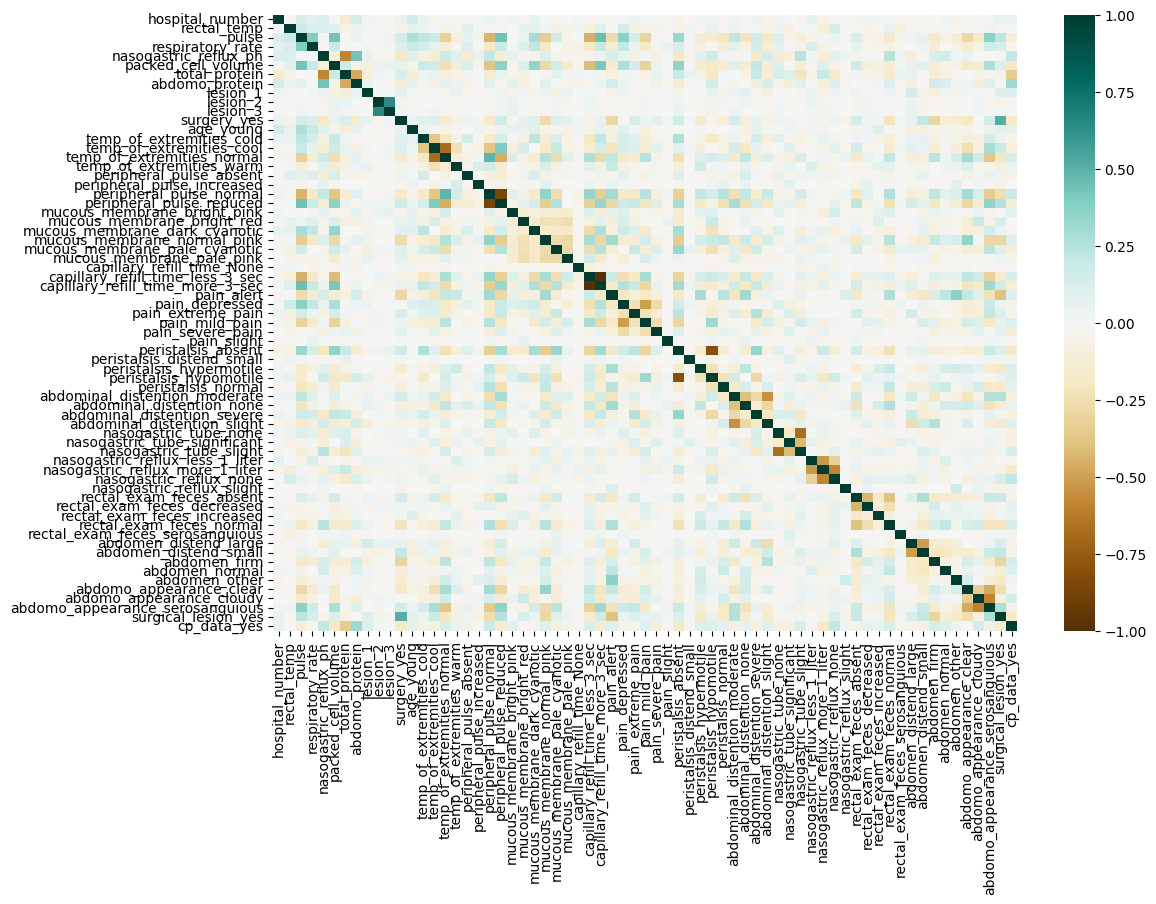

In [ ]:
fig = plt.figure()

fig.set_size_inches(12, 8)

sns.heatmap(df_dummed.corr(),
            xticklabels=df_dummed.columns,
            yticklabels=df_dummed.columns,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

plt.show()

In [ ]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(df_dummed, 15))

Top Absolute Correlations
capillary_refill_time_less_3_sec  capillary_refill_time_more_3_sec    0.985260
peripheral_pulse_normal           peripheral_pulse_reduced            0.868400
peristalsis_absent                peristalsis_hypomotile              0.807922
temp_of_extremities_cool          temp_of_extremities_normal          0.682159
nasogastric_tube_none             nasogastric_tube_slight             0.674693
lesion_2                          lesion_3                            0.644054
abdomo_appearance_cloudy          abdomo_appearance_serosanguious     0.592682
nasogastric_reflux_more_1_liter   nasogastric_reflux_none             0.592016
nasogastric_reflux_ph             total_protein                       0.583299
abdominal_distention_moderate     abdominal_distention_slight         0.552629
nasogastric_reflux_less_1_liter   nasogastric_reflux_more_1_liter     0.527315
pain_depressed                    pain_mild_pain                      0.512435
abdomen_distend_large     

In [ ]:
def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='pearson', min_periods=1)
    df_not_correlated = ~(df_corr.mask(np.eye(len(df_corr), dtype=bool)).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out

In [ ]:
df_corr = trimm_correlated(df_dummed, 0.6)
df_corr

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,surgery_yes,...,abdomen_distend_large,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_yes,cp_data_yes
id,,,,,,,,,,,,,,,,,,,,,
0,530001,38.1,132.0,24.0,6.5,57.0,8.5,3.4,2209,1,...,0,1,0,0,0,0,0,1,1,0
1,533836,37.5,88.0,12.0,2.0,33.0,64.0,2.0,2208,1,...,0,1,0,0,0,0,0,1,1,0
2,529812,38.3,120.0,28.0,3.5,37.0,6.4,3.4,5124,1,...,1,0,0,0,0,0,0,1,1,0
3,5262541,37.1,72.0,30.0,2.0,53.0,7.0,3.9,2208,1,...,0,1,0,0,0,0,1,0,1,1
4,5299629,38.0,52.0,48.0,7.0,47.0,7.3,2.6,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,535246,38.5,129.0,48.0,2.0,57.0,66.0,2.0,2206,1,...,1,0,0,0,0,0,0,1,1,0
1231,528570,37.5,60.0,50.0,3.0,35.0,6.4,3.6,2209,1,...,0,1,0,0,0,0,0,1,1,1
1232,529685,37.5,84.0,40.0,3.0,40.0,5.9,7.0,400,1,...,0,0,1,0,0,0,1,0,1,1


In [ ]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(df_corr, 5))

Top Absolute Correlations
abdomo_appearance_cloudy         abdomo_appearance_serosanguious    0.592682
nasogastric_reflux_more_1_liter  nasogastric_reflux_none            0.592016
nasogastric_reflux_ph            total_protein                      0.583299
abdominal_distention_moderate    abdominal_distention_slight        0.552629
nasogastric_reflux_less_1_liter  nasogastric_reflux_more_1_liter    0.527315
dtype: float64


In [ ]:
df_corr

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,surgery_yes,...,abdomen_distend_large,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_yes,cp_data_yes
id,,,,,,,,,,,,,,,,,,,,,
0,530001,38.1,132.0,24.0,6.5,57.0,8.5,3.4,2209,1,...,0,1,0,0,0,0,0,1,1,0
1,533836,37.5,88.0,12.0,2.0,33.0,64.0,2.0,2208,1,...,0,1,0,0,0,0,0,1,1,0
2,529812,38.3,120.0,28.0,3.5,37.0,6.4,3.4,5124,1,...,1,0,0,0,0,0,0,1,1,0
3,5262541,37.1,72.0,30.0,2.0,53.0,7.0,3.9,2208,1,...,0,1,0,0,0,0,1,0,1,1
4,5299629,38.0,52.0,48.0,7.0,47.0,7.3,2.6,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,535246,38.5,129.0,48.0,2.0,57.0,66.0,2.0,2206,1,...,1,0,0,0,0,0,0,1,1,0
1231,528570,37.5,60.0,50.0,3.0,35.0,6.4,3.6,2209,1,...,0,1,0,0,0,0,0,1,1,1
1232,529685,37.5,84.0,40.0,3.0,40.0,5.9,7.0,400,1,...,0,0,1,0,0,0,1,0,1,1


In [ ]:
from sklearn.feature_selection import VarianceThreshold

cutter = VarianceThreshold(threshold=0.1)
cutter.fit(df[numeric_columns])

column_with_low_variance = cutter.get_feature_names_out()

In [ ]:
df[column_with_low_variance]

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
id,,,,,,,,,,,
0,530001,38.1,132.0,24.0,6.5,57.0,8.5,3.4,2209,0,0
1,533836,37.5,88.0,12.0,2.0,33.0,64.0,2.0,2208,0,0
2,529812,38.3,120.0,28.0,3.5,37.0,6.4,3.4,5124,0,0
3,5262541,37.1,72.0,30.0,2.0,53.0,7.0,3.9,2208,0,0
4,5299629,38.0,52.0,48.0,7.0,47.0,7.3,2.6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1230,535246,38.5,129.0,48.0,2.0,57.0,66.0,2.0,2206,0,0
1231,528570,37.5,60.0,50.0,3.0,35.0,6.4,3.6,2209,0,0
1232,529685,37.5,84.0,40.0,3.0,40.0,5.9,7.0,400,0,0


In [ ]:
df[column_with_low_variance].describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,9.545004e+05,38.202186,79.574089,30.054251,4.382591,49.602429,21.388016,3.290931,3832.496356,14.612146,3.577328
std,1.356403e+06,0.788668,29.108638,16.452066,1.937357,10.535800,26.676453,1.589195,5436.733774,193.705735,88.858953
min,5.213990e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.500000,0.100000,0.000000,0.000000,0.000000
25%,5.288000e+05,37.800000,53.000000,18.000000,2.000000,43.000000,6.600000,2.000000,2205.000000,0.000000,0.000000
50%,5.297770e+05,38.200000,76.000000,28.000000,4.500000,48.000000,7.500000,3.000000,2209.000000,0.000000,0.000000
75%,5.341450e+05,38.600000,100.000000,36.000000,6.000000,57.000000,9.100000,4.300000,3205.000000,0.000000,0.000000
max,5.305129e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,3112.000000,2209.000000


In [ ]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import classification_report


y = df['outcome']
X = df_corr.drop(list, axis=1)

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(X, y,
                                                     test_size=0.2,
                                                     shuffle=True,
                                                     random_state=2022)

In [ ]:
pipe = Pipeline([('StandardScaler', StandardScaler()),
                ("one_vs_all", OneVsRestClassifier(SGDClassifier()))])


param_grid = {
    'one_vs_all__estimator__loss': ['hinge', 'log', 'modified_huber',
                                    'squared_hinge', 'perceptron'],

    'one_vs_all__estimator__penalty': ['l1', 'l2', 'elasticnet'],

    'one_vs_all__estimator__alpha': [0.001, 0.01, 0.1, 0.5, 1, 10]
}

test_fold = [0 if x in X_train.index else -1 for x in X.index]
ps = PredefinedSplit(test_fold)

search = GridSearchCV(pipe, param_grid, cv=ps, scoring='f1_micro')

search.fit(X, y)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=0.67308):
{'one_vs_all__estimator__alpha': 0.5, 'one_vs_all__estimator__loss': 'modified_huber', 'one_vs_all__estimator__penalty': 'elasticnet'}


In [ ]:
pipe.fit(X, y)
print(f"""{classification_report(y_test, pipe.predict(X_test))} """)

              precision    recall  f1-score   support

        died       0.64      0.64      0.64        77
  euthanized       0.70      0.64      0.67        58
       lived       0.71      0.75      0.73       112

    accuracy                           0.69       247
   macro avg       0.68      0.67      0.68       247
weighted avg       0.69      0.69      0.69       247
 


In [ ]:
# search.cv_results_

In [ ]:
columns_in_final_df = df_corr.drop(list, axis=1).columns

In [ ]:
df_test = pd.read_csv('/content/test (3).csv', index_col='id')
df_test

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
id,,,,,,,,,,,,,,,,,,,,,
1235,no,adult,534053,38.6,40.0,20.0,normal,normal,normal_pink,less_3_sec,...,distend_small,42.0,7.5,clear,2.3,no,0,0,0,no
1236,yes,adult,528469,38.2,112.0,48.0,cool,reduced,bright_pink,more_3_sec,...,distend_small,44.0,6.0,serosanguious,2.6,no,2208,0,0,yes
1237,yes,adult,528178,37.7,66.0,12.0,cool,normal,bright_red,less_3_sec,...,distend_small,31.5,6.0,cloudy,1.6,yes,2205,0,0,yes
1238,no,adult,534784,37.1,88.0,20.0,cool,reduced,pale_cyanotic,less_3_sec,...,distend_large,75.0,81.0,None,1.0,yes,1400,0,0,no
1239,yes,adult,529840,38.3,50.0,12.0,None,normal,bright_pink,less_3_sec,...,distend_small,37.0,6.8,cloudy,2.6,yes,2208,0,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,no,adult,529461,40.3,114.0,36.0,cool,reduced,normal_pink,more_3_sec,...,distend_large,57.0,8.1,serosanguious,4.5,yes,3205,0,0,yes
2055,yes,adult,535338,37.2,100.0,20.0,cool,reduced,pale_cyanotic,more_3_sec,...,distend_small,50.0,66.0,serosanguious,2.0,yes,2209,0,0,no
2056,yes,adult,529640,39.2,132.0,12.0,cool,reduced,dark_cyanotic,more_3_sec,...,None,53.0,7.6,serosanguious,4.5,yes,2205,0,0,no


In [ ]:
df_test_dummed = pd.get_dummies(df_test)

In [ ]:
df_test_dummed[columns_in_final_df]

,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,surgery_yes,age_young,temp_of_extremities_cold,...,abdomen_distend_large,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_yes,cp_data_yes
id,,,,,,,,,,,,,,,,,,,,,
1235,40.0,20.0,7.0,42.0,7.5,2.3,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1236,112.0,48.0,3.5,44.0,6.0,2.6,2208,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1237,66.0,12.0,3.0,31.5,6.0,1.6,2205,1,0,0,...,0,1,0,0,0,0,1,0,1,1
1238,88.0,20.0,2.0,75.0,81.0,1.0,1400,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1239,50.0,12.0,3.0,37.0,6.8,2.6,2208,1,0,0,...,0,1,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,114.0,36.0,7.0,57.0,8.1,4.5,3205,0,0,0,...,1,0,0,0,0,0,0,1,1,1
2055,100.0,20.0,2.0,50.0,66.0,2.0,2209,1,0,0,...,0,1,0,0,0,0,0,1,1,0
2056,132.0,12.0,6.5,53.0,7.6,4.5,2205,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [ ]:
list = ['hospital_number', 'rectal_temp']

for column in df_dummed.columns:
    if column not in df_test_dummed.columns:
        list.append(column)

In [ ]:
list

['hospital_number',
 'rectal_temp',
 'pain_slight',
 'peristalsis_distend_small',
 'nasogastric_reflux_slight',
 'rectal_exam_feces_serosanguious']

In [ ]:
X_test_test = df_test_dummed[columns_in_final_df]


answer = pipe.predict(X_test_test)

In [ ]:
answer_df = pd.DataFrame({
    'id': df_test_dummed.index,
    'outcome': answer
})

In [ ]:
answer_df.to_csv('answer.csv', sep=',', index=False)